In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import io
%matplotlib inline

In [2]:
from IPython.display import *

In [3]:
tbl_knesset20 = pd.read_table(io.StringIO("""מפלגה	מושבים
הליכוד	30
המחנה הציוני	24
הרשימה המשותפת	13
יש עתיד	11
כולנו	10
הבית היהודי	8
ש"ס	7
ישראל ביתנו	6
יהדות התורה	6
מרצ	5"""), sep='\t')
tbl_knesset20

,מפלגה,מושבים
0,הליכוד,30
1,המחנה הציוני,24
2,הרשימה המשותפת,13
3,יש עתיד,11
4,כולנו,10
5,הבית היהודי,8
6,"ש""ס",7
7,ישראל ביתנו,6
8,יהדות התורה,6
9,מרצ,5


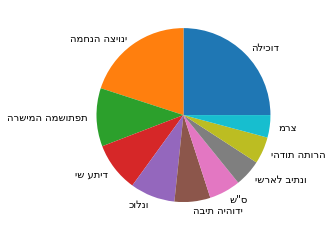

In [4]:
fig, ax = plt.subplots()
ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['מפלגה']
)
None

In [5]:
# pip install python-bidi
from bidi import algorithm as bidialg

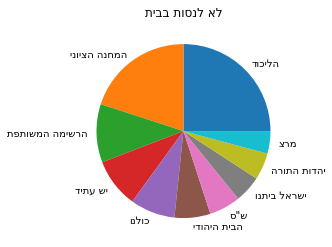

In [6]:
labels = [bidialg.get_display(l) for l in tbl_knesset20['מפלגה']]
tbl_knesset20['label'] = labels
fig, ax = plt.subplots()
ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['label']
)
ax.set_aspect(1.0)
ax.set_title(bidialg.get_display('לא לנסות בבית'))
None

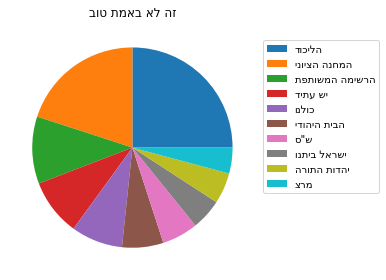

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset20['מושבים']
)
ax.legend(patches, labels, bbox_to_anchor=(1.0, 0.95))
ax.set_title(bidialg.get_display('זה לא באמת טוב'))
fig.tight_layout()
None

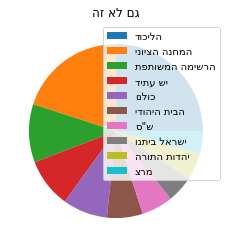

In [8]:
fig, ax = plt.subplots()
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset20['מושבים'],
)
ax.legend(patches, tbl_knesset20['label'])
ax.set_title(bidialg.get_display('גם לא זה'))
None

In [9]:
tbl_knesset20.sort_values('מושבים', inplace=True)

In [10]:
tbl_knesset20.shape

(10, 3)

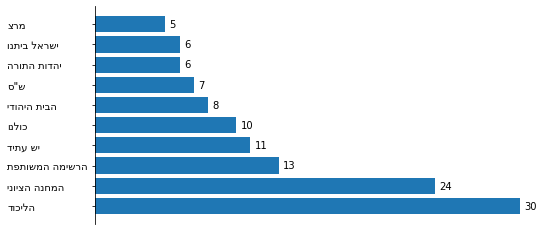

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
tbl_knesset20.sort_values('מושבים', inplace=True)
y = list(range(len(tbl_knesset20)))
ax.barh(
    y,
    tbl_knesset20['מושבים'],
)
ax.set_yticks(y)
labels = [bidialg.get_display(row['מפלגה']) for _, row in tbl_knesset20.iterrows()]
ax.set_yticklabels(labels, ha='left', x=-0.18)
ax.set_ylim(reversed(ax.get_ylim())); ax.set_xticks([])
sns.despine(ax=ax, bottom=True)
for i, (_, row) in enumerate(tbl_knesset20.iterrows()):
    ax.text(x=row['מושבים']+0.3, y=i, s=row['מושבים'], va='center')

Let's see what we can do with the pie charts

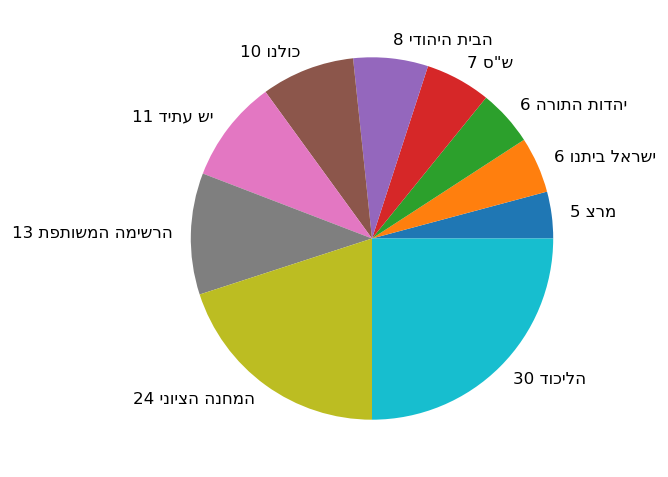

In [12]:
labels = [bidialg.get_display(row['מפלגה'] + ' %d'%(row['מושבים'])) for _, row in tbl_knesset20.iterrows()]
tbl_knesset20['label'] = labels
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['label']
)
ax.set_aspect(1.0)
None

In [13]:
coalition = 'הליכוד,כולנו,הבית היהודי,ש"ס,ישראל ביתנו,יהדות התורה'.split(',')
tbl_knesset20['coalition'] = tbl_knesset20['מפלגה'].isin(coalition)
tbl_knesset20['אחוז המושבים'] = tbl_knesset20['מושבים'] / tbl_knesset20['מושבים'].sum() * 100
tbl_knesset20

,מפלגה,מושבים,label,coalition,אחוז המושבים
9,מרצ,5,5 צרמ,False,4.166667
7,ישראל ביתנו,6,6 ונתיב לארשי,True,5.000000
8,יהדות התורה,6,6 הרותה תודהי,True,5.000000
6,"ש""ס",7,"7 ס""ש",True,5.833333
5,הבית היהודי,8,8 ידוהיה תיבה,True,6.666667
4,כולנו,10,10 ונלוכ,True,8.333333
3,יש עתיד,11,11 דיתע שי,False,9.166667
2,הרשימה המשותפת,13,13 תפתושמה המישרה,False,10.833333
1,המחנה הציוני,24,24 ינויצה הנחמה,False,20.000000
0,הליכוד,30,30 דוכילה,True,25.000000


In [14]:
cm_red = plt.get_cmap('Reds')
cm_blue = plt.get_cmap('Blues')
ix_coalition = 0
ix_opposition = 0
colors = []
for _, row in tbl_knesset20.iterrows():
    if row['coalition']:
        val = ix_coalition
        cm = cm_blue
        ix_coalition += 1
    else:
        val = ix_opposition
        cm = cm_red
        ix_opposition += 1
    colors.append(cm(
             0.5 + 0.01 * row['אחוז המושבים'] 
    ))
tbl_knesset20['color'] = colors

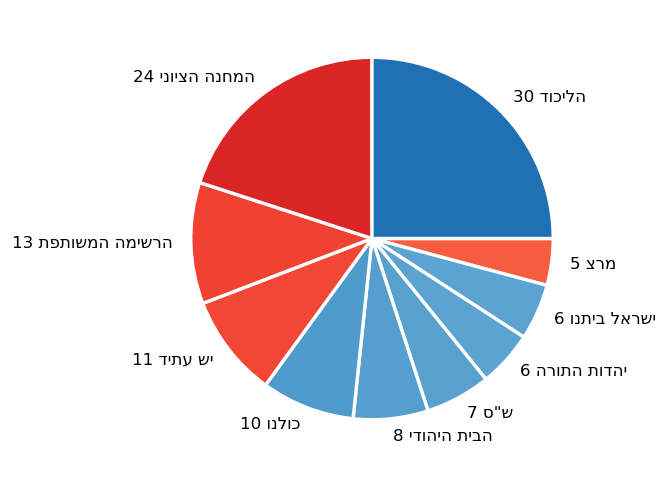

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['label'],
    colors=tbl_knesset20['color'],
    counterclock=False
)
for p in patches:
    p.set_linewidth(2)
    p.set_edgecolor('white')
None

In [16]:
tbl_knesset20['seats_coalition'] = tbl_knesset20['מושבים']
tbl_knesset20['seats_coalition'][~tbl_knesset20['coalition']] *= -1

/Users/boris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


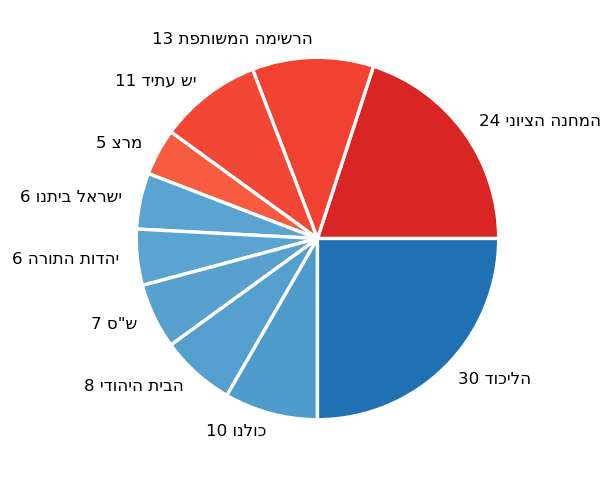

In [17]:
tbl_knesset20 = tbl_knesset20.sort_values(
    ['coalition', 'seats_coalition'],
    ascending=[True, True]
)
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['label'],
    colors=tbl_knesset20['color']
)
for p in patches:
    p.set_linewidth(2)
    p.set_edgecolor('white')
None

Text(0.5, 1.0, 'הקזח לארשיל הנתיא היצילאוק')

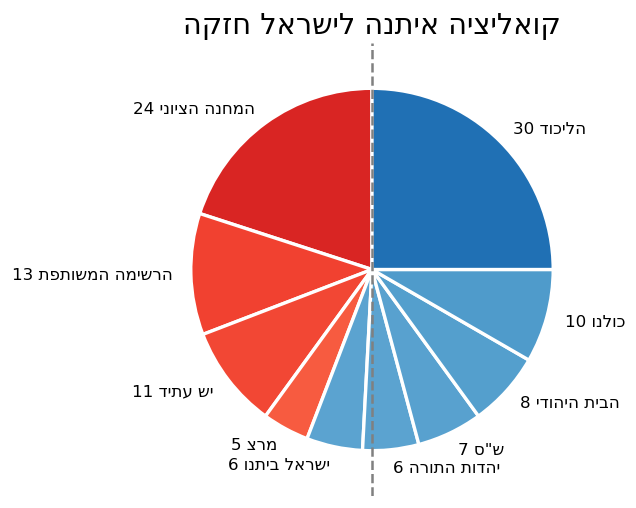

In [18]:
startangle=90

tbl_knesset20 = tbl_knesset20.sort_values(
    ['coalition', 'seats_coalition'],
    ascending=[True, True]
)
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_knesset20['מושבים'],
    labels=tbl_knesset20['label'],
    colors=tbl_knesset20['color'], 
    startangle=startangle, labeldistance=1.1
)
for p in patches:
    p.set_linewidth(2)
    p.set_edgecolor('white')
None
ax.axvline(0, ls='--', color='gray')

ax.set_title(bidialg.get_display('קואליציה איתנה לישראל חזקה'), fontsize='xx-large')